[BioStructures](https://github.com/BioJulia/BioStructures.jl) is "A Julia package to read, write and manipulate macromolecular structures (particularly proteins)". I'm copying code from the Examples section in their docs. 

In [3]:
using BioStructures
using Plots 

┌ Info: Precompiling BioStructures [de9282ab-8554-53be-b2d6-f6c222edabfc]
└ @ Base loading.jl:1260


In [39]:
path = downloadpdb("1EN2")

┌ Info: PDB exists: 1EN2
└ @ BioStructures /home/warren/.julia/packages/BioStructures/yQzDr/src/pdb.jl:240


"/home/warren/github/julia-random/1EN2.pdb"

In [49]:
path = downloadpdb("1ALW")
struc = read(path, PDB)

┌ Info: PDB exists: 1ALW
└ @ BioStructures /home/warren/.julia/packages/BioStructures/yQzDr/src/pdb.jl:240


ProteinStructure 1ALW.pdb with 1 models, 2 chains (A,B), 346 residues, 2928 atoms

In [50]:
struc['A']

Chain A with 173 residues, 51 other molecules, 1458 atoms

In [51]:
struc['B']

Chain B with 173 residues, 63 other molecules, 1470 atoms

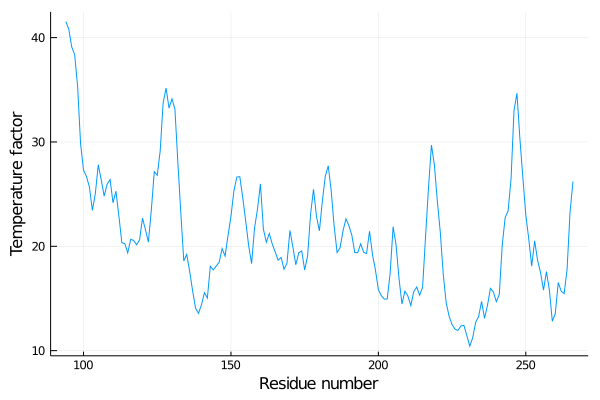

In [52]:
# Plot temperature factors of a protein
calphas = collectatoms(struc['A'], calphaselector)
plot(resnumber.(calphas), 
     tempfactor.(calphas), 
     xlabel="Residue number", 
     ylabel="Temperature factor", 
     label="")

In [53]:
for at in calphas
    if distance(struc['A'][38], at) < 5.0 && resnumber(at) != 38
        println(pdbline(at))
    end
end


KeyError: KeyError: key "38" not found

In [54]:
for res_a in collectresidues(struc["A"], standardselector)
    for res_b in collectresidues(struc["B"], standardselector)
        if distance(res_a, res_b) < 5.0
            println(resnumber(res_a), "A ", resnumber(res_b), "B")
        end
    end
end


114A 218B
116A 218B
135A 139B
139A 135B
140A 138B
140A 141B
140A 214B
140A 225B
140A 226B
141A 140B
143A 135B
143A 214B
143A 215B
143A 216B
143A 217B
143A 226B
144A 214B
147A 214B
150A 213B
153A 213B
154A 213B
155A 213B
156A 218B
203A 260B
204A 257B
206A 153B
206A 257B
206A 261B
207A 257B
207A 260B
207A 261B
210A 153B
210A 261B
210A 265B
211A 264B
213A 153B
213A 154B
213A 155B
213A 265B
214A 140B
214A 143B
214A 144B
214A 147B
214A 264B
214A 265B
214A 266B
215A 264B
216A 143B
225A 140B
226A 140B
226A 143B
230A 264B
233A 233B
233A 263B
233A 264B
233A 266B
234A 260B
234A 264B
237A 259B
237A 260B
237A 263B
237A 264B
238A 256B
238A 259B
238A 260B
240A 259B
241A 254B
241A 255B
241A 256B
241A 259B
250A 254B
250A 255B
250A 256B
251A 253B
251A 254B
251A 255B
251A 256B
252A 252B
252A 253B
252A 254B
252A 255B
252A 259B
253A 251B
253A 252B
253A 253B
254A 241B
254A 250B
254A 251B
254A 252B
254A 254B
255A 241B
255A 250B
255A 251B
255A 252B
256A 238B
256A 241B
256A 250B
257A 207B
259A 237B
259A 238B


In [57]:
l = pdbentrylist()

┌ Info: Fetching the list of all PDB entries from the RCSB server
└ @ BioStructures /home/warren/.julia/packages/BioStructures/yQzDr/src/pdb.jl:68
┌ Warning: Process error
│   exception = (InterruptException(), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007fa212a332f2, Ptr{Nothing} @0x00007fa203f14cd9, Ptr{Nothing} @0x00007fa204583199, Ptr{Nothing} @0x00007fa204683bea, Ptr{Nothing} @0x00007fa1b24ca7e3, Ptr{Nothing} @0x00007fa1b24ca0bf, Ptr{Nothing} @0x00007fa1b24ca702, Ptr{Nothing} @0x00007fa2129ec42a, Ptr{Nothing} @0x00007fa212a0aa9e, Ptr{Nothing} @0x0000000000000000])
└ @ Base process.jl:274
┌ Error: Download failed: 
└ @ Base download.jl:43


ProcessFailedException: failed process: Process(`curl -s -S -g -L -f -o /tmp/jl_xtTsYZ ftp://ftp.wwpdb.org/pub/pdb/derived_data/index/entries.idx`, ProcessSignaled(2)) [0]


In [58]:
l

164840-element Array{String,1}:
 "100D"
 "101D"
 "101M"
 "102D"
 "102L"
 "102M"
 "103D"
 "103L"
 "103M"
 "104D"
 "104L"
 "104M"
 "105D"
 ⋮
 "9NSE"
 "9PAI"
 "9PAP"
 "9PCY"
 "9PTI"
 "9RAT"
 "9RNT"
 "9RSA"
 "9RUB"
 "9WGA"
 "9XIA"
 "9XIM"